In [11]:
#Phương án 1, crawl dữ liệu ở nhiều trang 
import requests
from bs4 import BeautifulSoup

def get_data(url_visit):
    print('**Đang truy cập đường link',url_visit)
    
    url = "https://phongtro123.com/tinh-thanh/da-nang"
    html = requests.get(url).text
    soup = BeautifulSoup(html,'html5lib')
    
    TieuDe = soup.find_all('h3',class_ = "fs-6 fw-medium mb-2")
    GiaBan = soup.find_all('span',class_ = "text-price fw-semibold fs-6")
    DienTich = soup.find_all('span')
    DiaDiem = soup.find_all('a',class_ = "text_body")
    
    str = ""
    for i in range(len(TieuDe)):
        tieude = TieuDe[i].text.strip() if i < len(TieuDe) else ""
        giaban = GiaBan[i].text.strip() if i < len(GiaBan) else ""
        dientich = DienTich[i].text.strip() if i <len(DienTich) else ""
        diadiem = DiaDiem[i].text.strip() if i < len(DiaDiem)  else ""
        
        str += tieude + "\n"
        str += giaban + "\n"
        str += dientich + "\n"
        str += diadiem + "\n"
        str += "--------------\n"
    return str
def scrape_data(bđ,kt):
    data = ""
    for i in range(bđ,kt+1):
        url = f"https://phongtro123.com/tinh-thanh/da-nang?page={i}"
        page_data = get_data(url)
        data += page_data

    with open("PhongTro_DaNang.txt","w",encoding = 'utf-8') as file:
        file.write(data)
        
bđ = 1
kt = 10
scrape_data(bđ,kt)
    

**Đang truy cập đường link https://phongtro123.com/tinh-thanh/da-nang?page=1
**Đang truy cập đường link https://phongtro123.com/tinh-thanh/da-nang?page=2
**Đang truy cập đường link https://phongtro123.com/tinh-thanh/da-nang?page=3
**Đang truy cập đường link https://phongtro123.com/tinh-thanh/da-nang?page=4
**Đang truy cập đường link https://phongtro123.com/tinh-thanh/da-nang?page=5
**Đang truy cập đường link https://phongtro123.com/tinh-thanh/da-nang?page=6
**Đang truy cập đường link https://phongtro123.com/tinh-thanh/da-nang?page=7
**Đang truy cập đường link https://phongtro123.com/tinh-thanh/da-nang?page=8
**Đang truy cập đường link https://phongtro123.com/tinh-thanh/da-nang?page=9
**Đang truy cập đường link https://phongtro123.com/tinh-thanh/da-nang?page=10


In [13]:
#Phương thức 2, crawl dữ liệu có giới hạn bài viết, lưu mỗi bài báo vào một file có tên file riêng
# Crawl Tên tiêu đề, Ngày đăng, Tóm tin , Link web 

import requests
from bs4 import BeautifulSoup
import os

url = 'https://www.vietnamplus.vn/xahoi/giaoduc/'
html = requests.get(url).text
soup = BeautifulSoup(html, 'html5lib')

TieuDe = soup.find_all('h2',class_= 'story__heading')
NgayDang = soup.find_all('time',class_= "time")
TomTin = soup.find_all('p')

str = ""
output_folder = 'D:\ONTAPCUOIKI\Data'
limit = 10
for i in range(min(limit,len(TieuDe))):
    tieude = TieuDe[i].text.strip() if i < len(TieuDe) else ""
    ngaydang = NgayDang[i].text.strip() if i < len(NgayDang) else ""
    tomtin = TomTin[i].text.strip() if i < len(TomTin) else "" 
    link_web = TieuDe[i].find('a')['href'] if TieuDe[i].find('a') else ""   
    
    content = f"{tieude}\n{ngaydang}\n{tomtin}\n{link_web}\n"
    
    output_file = os.path.join(output_folder,f"26_News{i+1}.txt") 
    with open(output_file,"w",encoding = "utf-8") as file: 
        file.write(content)
        

    


In [10]:
# Câu 2 thi giữa kì

import nltk
import re
import os
from nltk.probability import FreqDist
from pyvi import ViTokenizer
from bs4 import BeautifulSoup

nltk.download('stopwords')

def load_vietnamese_stopwords(stopwords_file_path):
    try:
        with open(stopwords_file_path, 'r', encoding='utf-8') as f:
            return f.read().splitlines()
    except FileNotFoundError:
        print(f'File not found: {stopwords_file_path}')
        return []

folder_path = r"D:/26/Cau2/Data"
output_folder = r"D:/26/Cau2/Data/Preprocessing"
stopwords_file_path = r'D:/26/Cau2/vietnamese-stopwords.txt'


os.makedirs(output_folder, exist_ok=True)
stopwords_list = load_vietnamese_stopwords(stopwords_file_path)


for idx, filename in enumerate(os.listdir(folder_path), start=1):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        try:
            with open(file_path, "r", encoding="utf-8") as f:
                text = f.read()
        except UnicodeDecodeError:
            with open(file_path, "r", encoding="latin-1") as f:
                text = f.read()


        text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
        text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
        text = text.lower()  # Convert text to lowercase
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub("\d+", " ", text)  # Remove numbers
        text = " ".join(word for word in text.split() if word not in stopwords_list)  # Remove stopwords
        text = ViTokenizer.tokenize(text)  # Tokenize text

        output_file = os.path.join(output_folder, f"26_Pre{idx}.txt")
        with open(output_file, "w", encoding="utf-8") as out_file:
            out_file.write(text)
    

[nltk_data] Downloading package stopwords to C:\Users\MSI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Tiền xử lý dữ liệu của một file html 
import requests

url = 'https://en.wikipedia.org/wiki/Natural_language_processing'
html = requests.get(url)

if html.status_code == 200:
    with open("Cau1.txt","w", encoding = 'utf8') as file:
        file.write(html.text)
    print(html.text)
else:
    print ("Khong thanh cong")
    

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-custom-font-size-clientpref-1 vector-feature-appearance-pinned-clientpref-1 vector-feature-night-mode-enabled skin-theme-clientpref-day vector-toc-available" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Natural language processing - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpre

[nltk_data] Downloading package stopwords to C:\Users\MSI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\MSI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


File not found: D:/2627(C2)/vietnamese-stopwords.txt
Number of words:  18030
Top 100 words and their frequencies:
a: 820
span: 429
of: 295
the: 285
b: 243
div: 205
d: 185
and: 175
text: 143
e: 138
to: 126
in: 126
f: 125
classcitebracket: 122
language: 116
classmwredirect: 114
relnofollow: 108
classexternal: 107
is: 86
ul: 82
mwlistitema: 82
mwparseroutput: 75
n: 69
classinterlanguagelink: 69
relmwdeduplicatedinlinestyle: 68
hrefmwdatatemplatestylesr: 68
cs: 64
classreferencea: 61
classmwcitebacklinkba: 59
abspan: 59
cite: 58
for: 57
fenwikipediaorg: 54
natural: 53
hlist: 53
classcitation: 53
titlectx_verz: 53
amprft_val_fmtinfo: 53
aofi: 53
ffmt: 53
akev: 53
amtx: 53
classz: 53
this: 52
as: 52
asid: 52
anaturallanguageprocessing: 52
idcite_ref: 51
hrefcite_note: 51
hrefcite_ref: 51
idcite_note: 50
classreferencetextlink: 50
with: 47
spanspanlili: 46
from: 44
on: 44
nlp: 44
li: 43
that: 41
or: 39
s: 37
mrow: 36
processing: 35
eg: 35
are: 33
stylewidth: 32
by: 32
spanasup: 32
words: 31
s

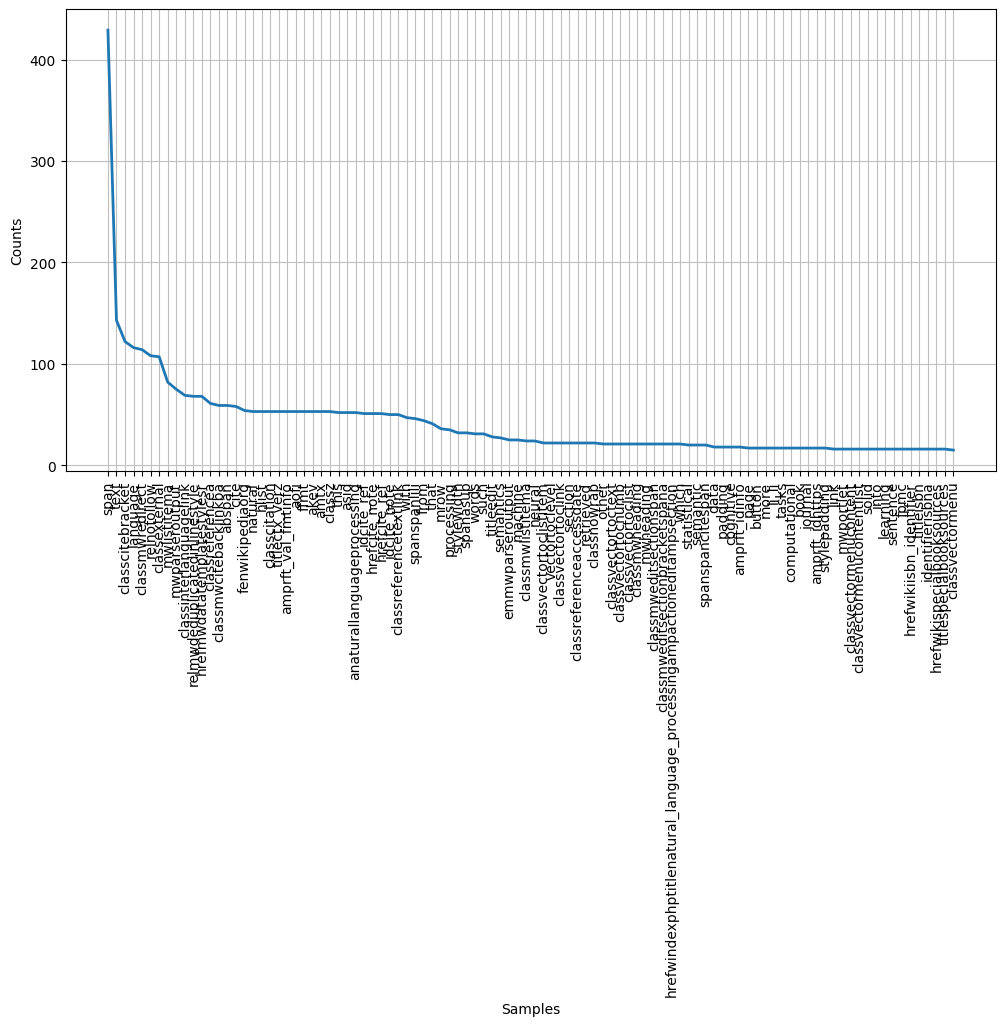

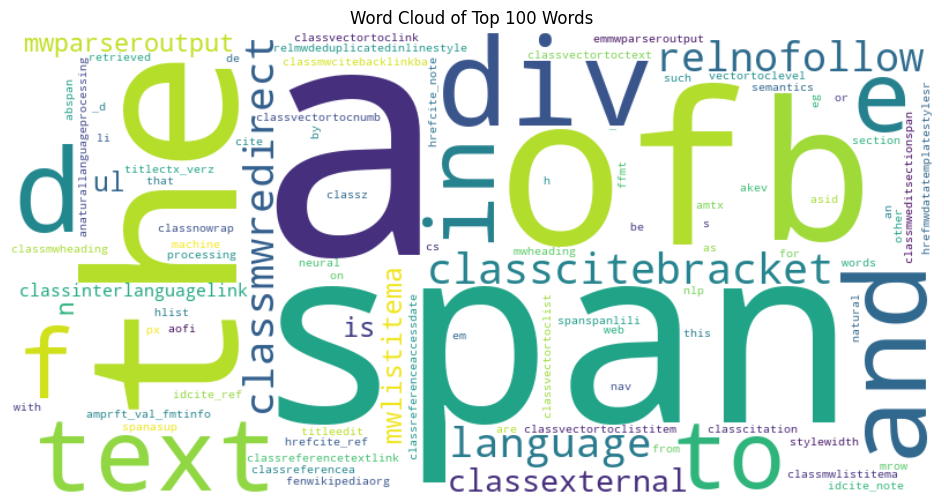

In [5]:
# Tiền xử lý dữ liệu 
# Tiền xử lý với đầu vào là mã html của 1 trang web 
import nltk
import re
import os
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from pyvi import ViTokenizer  # Use this if you are processing Vietnamese text
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

def load_vietnamese_stopwords(stopwords_file_path):
    try:
        with open(stopwords_file_path, 'r', encoding='utf-8') as f:
            stopwords_list = f.read().splitlines()
        return stopwords_list
    except FileNotFoundError:
        print(f'File not found: {stopwords_file_path}')
        return []
    
# Đọc file
input_file_path = r"Cau1.txt"
stopwords_file_path = r'D:/2627(C2)/vietnamese-stopwords.txt'

try:
    with open(input_file_path, "r", encoding="utf-8") as f:
        text = f.read()
except UnicodeDecodeError:
    with open(input_file_path, "r", encoding="latin-1") as f:
        text = f.read()

# Text preprocessing
text_pre = text.replace("\n", "")  # Xoá dấu câu
text_pre = text_pre.lower()  # Viết thường
text_pre = re.sub(r'[^\w\s]', '', text_pre)  # Xoá dấu câu
text_pre = re.sub("\d+", " ", text_pre)  # Xoá số

stopwords_list = load_vietnamese_stopwords(stopwords_file_path)
text_pre = " ".join(word for word in text_pre.split() if word not in stopwords_list) #Tách câu
text_pre = ViTokenizer.tokenize(text_pre) #Tách từ

frequency_dist = FreqDist(word.lower() for word in text_pre.split())

# In ra 100 từ có tần suất lớn nhất
print("Number of words: ", len(text_pre.split()))
top_100_words = frequency_dist.most_common(100)
print("Top 100 words and their frequencies:")
for word, freq in top_100_words:
    print(f"{word}: {freq}")
    
large_words = {k: v for k, v in frequency_dist.items() if len(k) > 3}
frequency_dist_large = FreqDist(large_words)
plt.figure(figsize=(12, 6))
frequency_dist_large.plot(100, cumulative=False)

# Word cloud
wcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_100_words))
plt.figure(figsize=(12, 6))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Top 100 Words")
plt.show()

    


[nltk_data] Downloading package stopwords to C:\Users\MSI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\MSI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tổng số từ: 19332
Top 100 từ xuất hiện nhiều nhất:
nam: 355
việt: 237
trận: 207
vtc: 184
email: 180
cầu_thủ: 169
đội: 167
văn: 161
bóng: 153
báo: 146
thông: 146
thắng: 141
hlv: 141
news: 139
điện_tử: 138
hotline: 135
bình_luận: 128
league: 127
nguyễn: 123
sân: 121
đội_tuyển: 118
giải: 114
messi: 111
tp: 110
định: 109
bóng_đá: 99
điện_thoại: 97
vòng: 95
hà_nội: 92
man: 92
zalo: 90
protected: 90
vov: 90
nữ: 90
trọng_tài: 79
clb: 79
trung: 74
cúp: 74
dương: 72
ghi_bàn: 72
trận_đấu: 70
thua: 68
v: 68
thị: 67
hcm: 65
thi_đấu: 64
utd: 64
công: 63
đồng: 62
đối_thủ: 62
kim: 61
châu: 60
hải: 59
kỹ_thuật: 59
madrid: 59
thái: 59
đá: 58
mùa: 57
minh: 57
ronaldo: 57
hai: 56
khu_vực: 55
real: 55
vô_địch: 55
đại_diện: 54
lạc: 53
đường: 53
inter: 53
việt_nam: 53
miami: 52
tiếp: 51
liverpool: 51
sik: 51
c: 50
indonesia: 50
tiếng: 49
truyền_thông: 49
ngô: 49
đầu_tiên: 49
bàn: 49
quảng_cáo: 48
bảng: 48
quang: 48
quyết: 48
tùng: 47
bất_kỳ: 47
lý: 47
facebook: 46
thư: 46
tổng_biên_tập: 46
văn_phòng: 46
quố

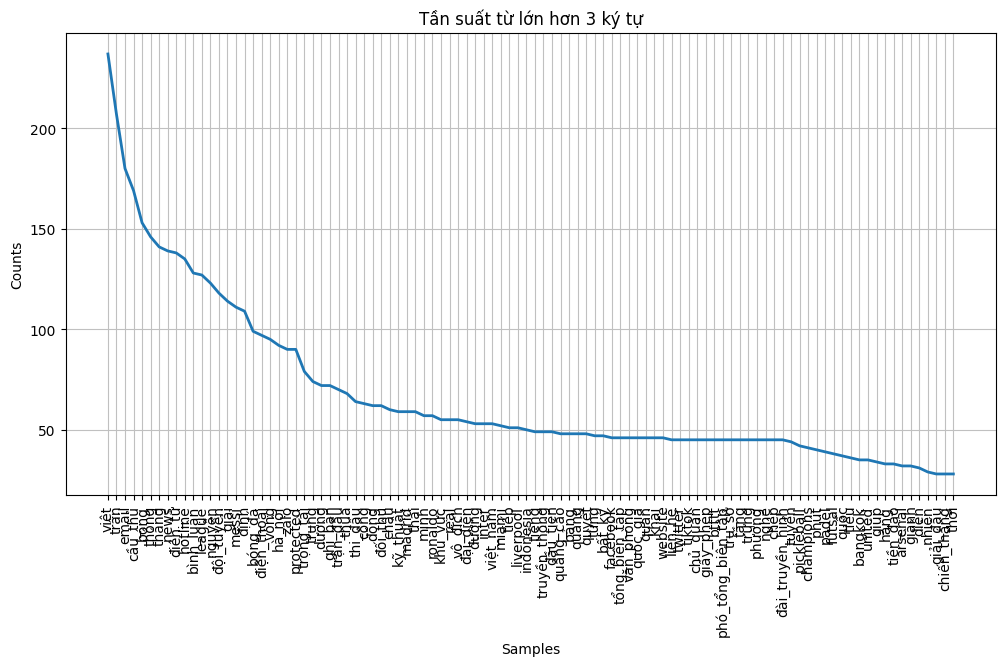

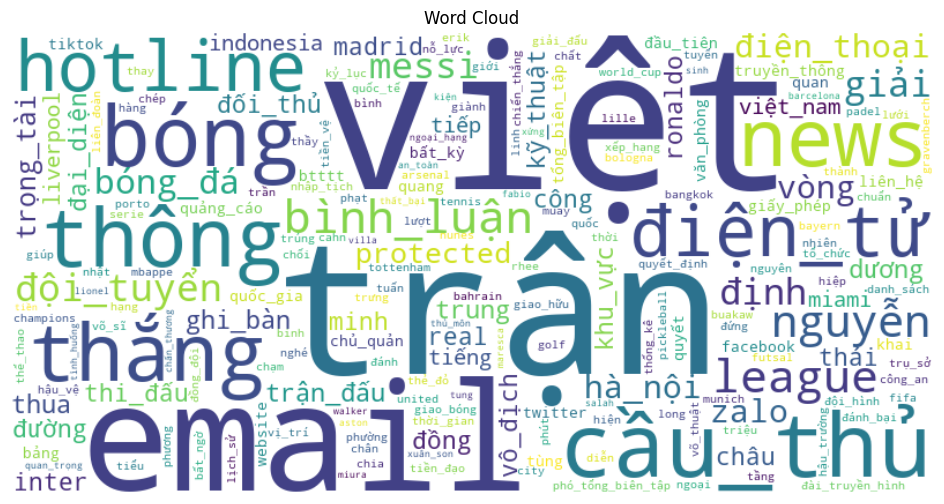

In [ ]:
# Bài tập nhóm 
# Tiền xử dữ liệu các file.txt trong folder có sẵn
# Thống kê tần suất và biểu diễn wordcloud
import nltk
import re
import os
from nltk.probability import FreqDist
from pyvi import ViTokenizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

def load_vietnamese_stopwords(stopwords_file_path):
    try:
        with open(stopwords_file_path, 'r', encoding='utf-8') as f:
            stopwords_list = f.read().splitlines()
        return stopwords_list
    except FileNotFoundError:
        print(f'File not found: {stopwords_file_path}')
        return []


folder_path = "D:/2627(C2)/Cau5/Noidung"
stopwords_file_path = "D:/26/Cau2/vietnamese-stopwords.txt"


khotext = []
for idx, filename in enumerate(os.listdir(folder_path), start=1):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        try:
            with open(file_path, "r", encoding="utf-8") as f:
                text = f.read()
        except UnicodeDecodeError:
            with open(file_path, "r", encoding="latin-1") as f:
                text = f.read()
        khotext.append(text)
combined_text = " ".join(khotext)

text_pre = combined_text.lower()  # Convert text to lowercase
text_pre = re.sub(r'http\S+|www.\S+', '', text_pre)  # Loại bỏ URL
text_pre = re.sub(r'[^\w\s]', ' ', text_pre)  # Loại bỏ dấu câu
text_pre = re.sub(r'\d+', ' ', text_pre)  # Loại bỏ số
text_pre = re.sub(r'\s+', ' ', text_pre).strip()  


stopwords_list = load_vietnamese_stopwords(stopwords_file_path)
text = " ".join(word for word in text_pre.split() if word not in stopwords_list)

# Tokenization
text = ViTokenizer.tokenize(text)

# Thống kê tần suất từ
frequency_dist = FreqDist(word.lower() for word in text.split())

# Hiển thị thông tin
print("Tổng số từ:", len(text.split()))
top_words = frequency_dist.most_common(100)
print("Top 100 từ xuất hiện nhiều nhất:")
for word, freq in top_words:
    print(f"{word}: {freq}")

# Biểu diễn biểu đồ tần suất
large_words = {k: v for k, v in frequency_dist.items() if len(k) > 3}
frequency_dist_large = FreqDist(large_words)
plt.figure(figsize=(12, 6))
frequency_dist_large.plot(100, cumulative=False)
plt.title("Tần suất từ lớn hơn 3 ký tự")
plt.show()

# Tạo Word Cloud
wcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(large_words))
plt.figure(figsize=(12, 6))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud")
plt.show()


[nltk_data] Downloading package stopwords to C:\Users\MSI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\MSI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Tổng số từ  5611
Tần suất xuất hiện của các từ
password: 212
manag: 107
secur: 68
use: 62
data: 55
featur: 48
devic: 42
best: 38
avira: 38
ironvest: 34
free: 32
one: 32
like: 30
web: 30
inform: 30
user: 29
protect: 29
servic: 29
offer: 28
onlin: 27
even: 26
need: 26
access: 26
prime: 26
your: 25
number: 25
also: 24
browser: 24
track: 24
privaci: 23
fingerprint: 23
window: 22
address: 22
set: 22
store: 21
option: 20
tool: 20
file: 20
mask: 20
michael: 19
scan: 19
make: 19
review: 19
perform: 19
time: 19
digit: 18
credit_card: 18
updat: 17
plan: 17
dashlan: 17
price: 17
master: 17
email: 17
includ: 16
paid: 16
websit: 16
person: 16
get: 16
login: 15
read: 15
creat: 15
provid: 15
account: 15
site: 15
vpn: 15
pcworld: 14
phone: 14
uniqu: 14
firefox: 14
year: 14
softwar: 14
block: 14
advertis: 14
new: 13
system: 13
full: 13
differ: 13
googl: 13
instal: 13
specif: 13
credenti: 13
complex: 13
collect: 13
keep: 12
per: 12
crack: 12
come: 12
gener: 12
way: 12
share: 12
dont: 12
program: 12
pc: 

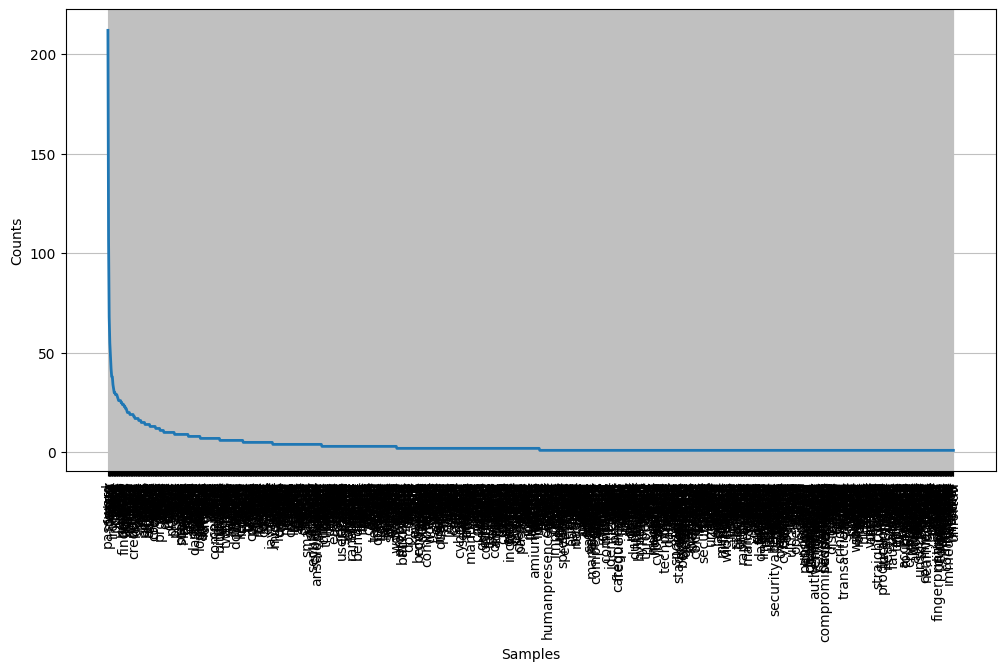

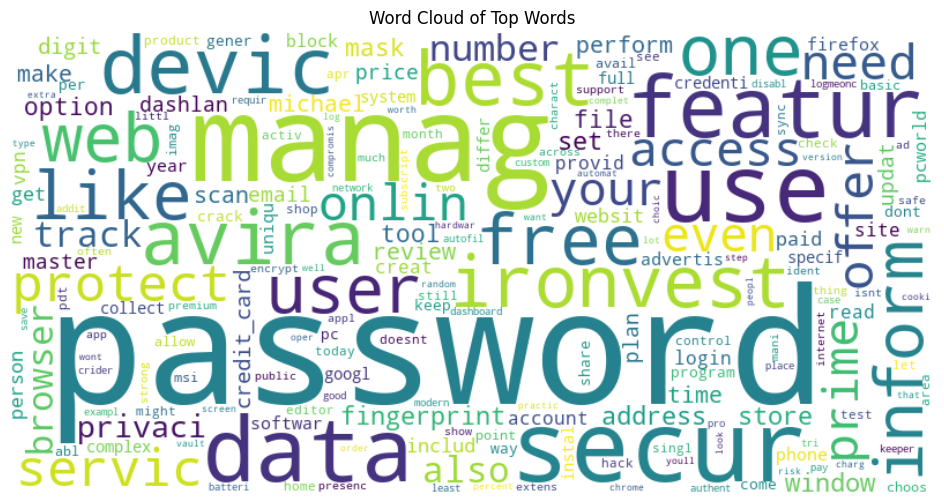

In [9]:
# Bài thi giữa kì
import nltk
import re
import os
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from pyvi import ViTokenizer  # Use this if you are processing Vietnamese text
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

def load_vietnamese_stopwords(stopwords_file_path):
    try:
        with open(stopwords_file_path, 'r', encoding='utf-8') as f:
            stopwords_list = f.read().splitlines()
        return stopwords_list
    except FileNotFoundError:
        print(f'File not found: {stopwords_file_path}')
        return []


folder_path = r"D:/26/Cau3/Data" 
stopwords_file_path = r'D:/26/Cau3/vietnamese-stopwords.txt'

all_texts = []

for filename in os.listdir(folder_path):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        try:
            with open(file_path, "r", encoding="utf-8") as f:
                text = f.read()
                all_texts.append(text) 
        except UnicodeDecodeError:
            with open(file_path, "r", encoding="latin-1") as f:
                text = f.read()
                all_texts.append(text)  
combined_text = " ".join(all_texts)

text_pre = combined_text.replace("\n", "")  
text_pre = text_pre.lower()  
text_pre = re.sub(r'[^\w\s]', '', text_pre) 
text_pre = re.sub("\d+", " ", text_pre)  

stopwords_list = load_vietnamese_stopwords(stopwords_file_path)
text_pre = " ".join(word for word in text_pre.split() if word not in stopwords_list)

text_pre = ViTokenizer.tokenize(text_pre)  


frequency_dist = FreqDist(word.lower() for word in text_pre.split())

print("Tổng số từ ", len(text_pre.split()))
top_words = frequency_dist.most_common(len(text_pre.split()))
print("Tần suất xuất hiện của các từ")
for word, freq in top_words:
    print(f"{word}: {freq}")

large_words = {k: v for k, v in frequency_dist.items() if len(k) > 3}
frequency_dist_large = FreqDist(large_words)
plt.figure(figsize=(12, 6))
frequency_dist_large.plot(len(text_pre.split()), cumulative=False)

# Build a word cloud
wcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(dict(top_words))
plt.figure(figsize=(12, 6))
plt.imshow(wcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Top Words")
plt.show()

In [1]:
# Chương 4. Xem từ có trọng số cao nhất và dự đoán xem từ đó thuộc chủ đề nào
import nltk
import re
import os
from nltk.probability import FreqDist
from pyvi import ViTokenizer
from bs4 import BeautifulSoup

nltk.download('stopwords')

def load_vietnamese_stopwords(stopwords_file_path):
    try:
        with open(stopwords_file_path, 'r', encoding='utf-8') as f:
            return f.read().splitlines()
    except FileNotFoundError:
        print(f'File not found: {stopwords_file_path}')
        return []

folder_path = "D:/4"
stopwords_file_path = "D:/26/Cau2/vietnamese-stopwords.txt"

stopwords_list = load_vietnamese_stopwords(stopwords_file_path)

khotext=[]
for idx, filename in enumerate(os.listdir(folder_path), start=1):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        try:
            with open(file_path, "r", encoding="utf-16") as f:
                text = f.read()
        except UnicodeDecodeError:
            with open(file_path, "r", encoding="latin-1") as f:
                text = f.read()


        text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
        text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
        text = text.lower()  # Convert text to lowercase
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub("\d+", " ", text)  # Remove numbers
        text = " ".join(word for word in text.split() if word not in stopwords_list)  # Remove stopwords
        
        text = ViTokenizer.tokenize(text)  
        text=text.split('.')# Tokenize text

        khotext.append(text)
print(khotext)

[nltk_data] Downloading package stopwords to C:\Users\MSI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


[['thành_lập_trường đại_học phan châu trinh phép thức phủ trường đại_học đời trường đh phan châu trinh hội an quảng_nam lập_trường khoa_học khoa_học văn_hóa quen hoàng_tụy phan đình diệu phạm hiển nguyễn văn hạnh nguyên ngọc lê văn cường giám_đốc nghiên_cứu cnrs paris ngô bình đh harvard hoa kỳ khoa_học văn_hóa trường đại_học tư_thục đa ngành trọng khoa_học nhiên khoa_học xã_hội nhân_văn mô_hình đại_học tiên_tiến kiểu trường đại_học hoa_tiêu góp biến thiết đại_học c húng ta công chuẩn đội_ngũ giảng_viên chất chuẩn sở vật_chất gấp_rút hoàn_tất_thể bắt_đầu thức đi hoạt_động'], ['chương_trình học ngành quan_hệ quốc_tế chuẩn ngoái ngành quan_hệ quốc_tế trường đh khoa_học xã_hội nhân_văn tphcm chương_trình đào học xong thể phạm an kiepvesau yahoocom ban đào đh quốc_gia tphcm ngành quan_hệ quốc_tế đào trường đh khoa_học xã_hội nhân_văn trang sinh_viên kiến_thức khoa_học xã_hội nhân_văn lịch_sử dân_tộc việt nam trọng giới nắm vững chủ_trương đường_lối đảng đối_ngoại sở kiến_thức chuyên_sâu hệ

In [2]:

from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd


D=khotext
D = [' '.join(sentence) for sentence in D]
tr_idf_model = TfidfVectorizer()
tf_idf_vector = tr_idf_model.fit_transform(D)
tf_idf_array = tf_idf_vector.toarray()
W = tr_idf_model.get_feature_names_out()

# Tạo DataFrame từ ma trận TF-IDF
df_tf_idf = pd.DataFrame(tf_idf_array, columns=W)

# Tìm chủ đề cho từng tài liệu
def get_top_n_words_with_freq(data, n=5):
    top_words_with_freq = data.apply(lambda x: x.nlargest(n).items(), axis=1)
    return top_words_with_freq

# Lấy 5 từ có trọng số cao nhất cùng với tần suất xuất hiện
top_words_freq = get_top_n_words_with_freq(df_tf_idf, n=5)

# Hiển thị kết quả
for idx, words_freq in enumerate(top_words_freq):
    print(f"Tài liệu {idx + 1}:")
    for word, freq in words_freq:
        print(f"  - Từ: '{word}', Trọng số: {freq:.4f}")

Tài liệu 1:
  - Từ: 'đại_học', Trọng số: 0.4079
  - Từ: 'khoa_học', Trọng số: 0.3166
  - Từ: 'phan', Trọng số: 0.3034
  - Từ: 'trinh', Trọng số: 0.2023
  - Từ: 'văn', Trọng số: 0.2023
Tài liệu 2:
  - Từ: 'quốc_tế', Trọng số: 0.4263
  - Từ: 'quan_hệ', Trọng số: 0.3410
  - Từ: 'đối_ngoại', Trọng số: 0.2910
  - Từ: 'nhân_văn', Trọng số: 0.2558
  - Từ: 'khoa_học', Trọng số: 0.2429
Tài liệu 3:
  - Từ: 'trung_tâm', Trọng số: 0.3011
  - Từ: 'mic', Trọng số: 0.2880
  - Từ: 'nhập_học', Trọng số: 0.2880
  - Từ: 'tdtt', Trọng số: 0.2560
  - Từ: 'thông_báo', Trọng số: 0.2240
Tài liệu 4:
  - Từ: 'trường', Trọng số: 0.4695
  - Từ: 'nghề', Trọng số: 0.3225
  - Từ: 'học', Trọng số: 0.2118
  - Từ: 'kỹ_thuật', Trọng số: 0.2030
  - Từ: 'trọng', Trọng số: 0.1776
Tài liệu 5:
  - Từ: 'câu', Trọng số: 0.8772
  - Từ: 'gốc', Trọng số: 0.1806
  - Từ: 'above', Trọng số: 0.1468
  - Từ: 'chắn', Trọng số: 0.1468
  - Từ: 'of', Trọng số: 0.1468
Tài liệu 6:
  - Từ: 'hc', Trọng số: 0.4754
  - Từ: 'chuyên', Trọng số: 0.

# GIÁO DỤC 

In [28]:
# Chương 5: Tìm độ tương đồng của văn bản 
# Trường hợp có sẵn dữ liệu từ 4 file txt
import nltk
import re
import os
from pyvi import ViTokenizer
from bs4 import BeautifulSoup
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

nltk.download('stopwords')

def load_vietnamese_stopwords(stopwords_file_path):
    try:
        with open(stopwords_file_path, 'r', encoding='utf-8') as f:
            return f.read().splitlines()
    except FileNotFoundError:
        print(f'File not found: {stopwords_file_path}')
        return []

def create_dataframe(matrix, tokens):
    return pd.DataFrame(matrix, columns=tokens)

def compute_tfidf_similarity(khotext, filenames):
    # Create TF-IDF matrix
    vectorizer = TfidfVectorizer()
    vector_matrix = vectorizer.fit_transform(khotext)

    # Compute cosine similarity
    cosine_similarity_matrix = cosine_similarity(vector_matrix)

    # Create DataFrame for similarity
    similarity_df = pd.DataFrame(cosine_similarity_matrix, index=filenames, columns=filenames)

    return similarity_df

folder_path = "D:\\MIS\\KY5 2024 -2025\\KHAI PHA DU LIEU WEB\\Chương 5\\DuLieu"
stopwords_file_path = "D:/26/Cau2/vietnamese-stopwords.txt"

stopwords_list = load_vietnamese_stopwords(stopwords_file_path)

khotext = []
filenames = []

for idx, filename in enumerate(os.listdir(folder_path), start=1):
    if filename.endswith('.txt'):
        file_path = os.path.join(folder_path, filename)
        try:
            with open(file_path, "r", encoding="utf-8") as f:
                text = f.read()
        except UnicodeDecodeError:
            with open(file_path, "r", encoding="latin-1") as f:
                text = f.read()

        # Tiền xử lý văn bản
        text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
        text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
        text = text.lower()  # Convert text to lowercase
        text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
        text = re.sub("\d+", " ", text)  # Remove numbers
        text = " ".join(word for word in text.split() if word not in stopwords_list)  # Remove stopwords

        text = ViTokenizer.tokenize(text)  
        text = text.split('.')  # Tokenize text

        khotext.append(" ".join(text))  # Convert to string to build vector
        filenames.append(filename)

# Compute and display TF-IDF similarity
similarity_df = compute_tfidf_similarity(khotext, filenames)
print(similarity_df)


[nltk_data] Downloading package stopwords to C:\Users\MSI
[nltk_data]     PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


          doc1.txt  doc2.txt  doc3.txt  doc4.txt
doc1.txt  1.000000  0.788239  0.076987  0.094430
doc2.txt  0.788239  1.000000  0.059546  0.089173
doc3.txt  0.076987  0.059546  1.000000  0.061200
doc4.txt  0.094430  0.089173  0.061200  1.000000


In [30]:
# Chương 5: Đánh giá mức độ tương đồng của 4 file
import pandas as pd
import os
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import underthesea #pip install underthesea

Path=os.getcwd() + "\\Data"

In [37]:
# Đọc file dữ liệu
def read_file(filename):	    
    filename=os.path.join(Path, filename)        
    with open(filename, 'r',encoding="utf-8") as f:
        data = f.read()

    return data.encode('utf-8')

# Chuẫn hóa dữ liệu
def create_dataframe(matrix, tokens):
    doc_names = [f'doc_{i+1}' for i, _ in enumerate(matrix)]
    df = pd.DataFrame(data=matrix, index=doc_names, columns=tokens)
    return(df)

# Tiền xử lý văn bản
import re
def Text_Preprocessing(doc):
    text_pre = doc.lower()
    
    text_pre = underthesea.word_tokenize(text_pre, format="text")
    text_pre = underthesea.text_normalize(text_pre)
    
    text_pre = text_pre.replace('XXXX', '')        
    text_pre = text_pre.replace(u'\ufffd', '')   # Replaces the ASCII symbol with ''
    text_pre = re.sub(r'[^\w\s]','',text_pre)
    text_pre = text_pre.rstrip('\n')              # Removes line breaks
    text_pre = text_pre.casefold()                # Makes all letters lowercase
    
    text_pre = re.sub('\W_',' ', text_pre)        # removes specials characters and leaves only words
    text_pre = re.sub("\S*\d\S*"," ", text_pre)   # removes numbers and words concatenated with numbers IE h4ck3r. Removes road names such as BR-381.
    text_pre = re.sub("\S*@\S*\s?"," ", text_pre) # removes emails and mentions (words with @)
    text_pre = re.sub(r'http\S+', '', text_pre)   # removes URLs with http
    text_pre = re.sub(r'www\S+', '', text_pre)    # removes URLs with www
        
        
    ##Remove stop words
    filename=os.path.join(Path, "vietnamese-stopwords.txt")
    f = open(filename, "r", encoding="utf-8")
    
    #Get Stop words Dictionaries
    List_StopWords=f.read().split("\n")
    text_pre=" ".join(text for text in text_pre.split() if text not in List_StopWords)
    
    return text_pre

In [38]:
# Define the Data
doc_1=read_file("doc1.txt")	
doc_2=read_file("doc2.txt") 
doc_3=read_file("doc3.txt")
doc_3=read_file("doc3.txt")

doc_4=Text_Preprocessing(doc_1)
doc_5=Text_Preprocessing(doc_2)
doc_6=Text_Preprocessing(doc_3)

data = [doc_1, doc_2, doc_3,doc_4]
data

[b'b\xc3\xa1o \xc4\x91i\xe1\xbb\x87n_t\xe1\xbb\xad d\xc3\xa2n_tr\xc3\xad t\xe1\xbb\xa9c c\xe1\xba\xadp_nh\xe1\xba\xadt li\xc3\xaan_t\xe1\xbb\xa5c tp h\xe1\xbb\x93 ch\xc3\xad minh c d\xc3\xa2n sinhd\xc3\xa2n sinh ficafica dtinewsdtinews \xc4\x91\xc4\x83ng_nh\xe1\xba\xadp video kinh_doanh x\xc3\xa3_h\xe1\xbb\x99i gi\xe1\xbb\x9bi gi\xe1\xba\xa3i_tr\xc3\xad b\xe1\xba\xa5t_\xc4\x91\xe1\xbb\x99ng_s\xe1\xba\xa3n th\xe1\xbb\x83_thao nh\xc3\xa2n s\xe1\xbb\xa9c_kh\xe1\xbb\x8fe xe s\xe1\xbb\xa9c gi\xc3\xa1o_d\xe1\xbb\xa5c an_sinh ph\xc3\xa1p_lu\xe1\xba\xadt th\xe1\xbb\x83 thaob\xc3\xb3ng \xc4\x91\xc3\xa1 d\xc3\xb2ng ki\xe1\xbb\x87n pickleball tuy\xe1\xbb\x83n futsal vi\xe1\xbb\x87t_nam vui tr\xe1\xba\xadn k\xe1\xba\xbft australia s\xc3\xb4ng lam s\xc3\xb4ng lam s\xc3\xa1u nam mi\xe1\xbb\x81n b\xe1\xba\xafc d\xc3\xa2n_tr\xc3\xad \xc4\x91\xe1\xbb\x99i_tuy\xe1\xbb\x83n futsal vi\xe1\xbb\x87t_nam th\xc4\x83ng_ti\xe1\xba\xbfn m\xe1\xba\xbd b\xe1\xba\xa3ng x\xe1\xba\xbfp_h\xe1\xba\xa1ng fifa tr\xe1\xba

In [39]:

# Xây dựng vector TF-IDF
CountVect = CountVectorizer()
vector_matrix = CountVect.fit_transform(data)
vector_matrix.shape

(4, 619)

In [40]:
tokens = CountVect.get_feature_names_out()
create_dataframe(vector_matrix.toarray(),tokens)

# Tính toán độ tương đồng
cosine_similarity_matrix = cosine_similarity(vector_matrix)
Similarity=create_dataframe(cosine_similarity_matrix,['doc_1','doc_2','doc_3','doc_4'])

Similarity

,doc_1,doc_2,doc_3,doc_4
doc_1,1.000000,0.828305,0.166523,0.841364
doc_2,0.828305,1.000000,0.131591,0.626563
doc_3,0.166523,0.131591,1.000000,0.142623
doc_4,0.841364,0.626563,0.142623,1.000000


In [ ]:
# Bài tập nhóm chương 5
folder_path = "D:\\ONTAPCUOIKI"
stopwords_file_path = "D:/26/Cau2/vietnamese-stopwords.txt"

stopwords_list = load_vietnamese_stopwords(stopwords_file_path)

khotext = []
filenames = []

# Duyệt qua các thư mục con
subfolders = ["1", "2", "3"]  # Danh sách thư mục con
for subfolder in subfolders:
    subfolder_path = os.path.join(folder_path, subfolder)  # Đường dẫn thư mục con
    for filename in os.listdir(subfolder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(subfolder_path, filename)
            try:
                with open(file_path, "r", encoding="utf-8") as f:
                    text = f.read()
            except UnicodeDecodeError:
                with open(file_path, "r", encoding="latin-1") as f:
                    text = f.read()

            # Tiền xử lý văn bản
            text = BeautifulSoup(text, "html.parser").get_text()  # Remove HTML tags
            text = re.sub(r'http\S+|www\S+', '', text)  # Remove URLs
            text = text.lower()  # Convert text to lowercase
            text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
            text = re.sub("\d+", " ", text)  # Remove numbers
            text = " ".join(word for word in text.split() if word not in stopwords_list)  # Remove stopwords

            text = ViTokenizer.tokenize(text)
            text = text.split('.')  # Tokenize text

            khotext.append(" ".join(text))  # Convert to string to build vector
            filenames.append(f"{filename}")
# Compute and display TF-IDF similarity
similarity_df = compute_tfidf_similarity(khotext, filenames)
print(similarity_df)


            1 (1).txt  1 (10).txt  1 (11).txt  1 (12).txt  1 (13).txt  \
1 (1).txt    1.000000    0.157451    0.241615    0.291584    0.366345   
1 (10).txt   0.157451    1.000000    0.191034    0.166492    0.192168   
1 (11).txt   0.241615    0.191034    1.000000    0.307212    0.319451   
1 (12).txt   0.291584    0.166492    0.307212    1.000000    0.381901   
1 (13).txt   0.366345    0.192168    0.319451    0.381901    1.000000   
1 (14).txt   0.221699    0.157332    0.318102    0.223966    0.232137   
1 (15).txt   0.192191    0.141269    0.282129    0.249104    0.270931   
1 (16).txt   0.158702    0.077255    0.201894    0.204273    0.195566   
1 (17).txt   0.386470    0.212052    0.286671    0.321039    0.502030   
1 (18).txt   0.196913    0.170439    0.267159    0.291909    0.318817   
1 (19).txt   0.179467    0.118476    0.109773    0.205182    0.330235   
1 (2).txt    0.223325    0.101160    0.163543    0.248088    0.327178   
1 (20).txt   0.191625    0.164127    0.402119    0.

In [60]:
def get_sorted_similarity_pairs(similarity_df):
    pairs = []
    filenames = similarity_df.index.tolist()

    # Duyệt qua ma trận và lấy các cặp giá trị
    for i in range(len(filenames)):
        for j in range(i + 1, len(filenames)):  
            file1 = filenames[i]
            file2 = filenames[j]
            similarity = similarity_df.iloc[i, j]
            pairs.append((file1, file2, similarity))

    # Sắp xếp theo thứ tự giảm dần của độ tương đồng
    sorted_pairs = sorted(pairs, key=lambda x: x[2], reverse=True)
    return sorted_pairs

# Gọi hàm và hiển thị danh sách các cặp tin tức
sorted_similarity_pairs = get_sorted_similarity_pairs(similarity_df)
for file1, file2, similarity in sorted_similarity_pairs:
    print(f"{file1} - {file2}: {similarity:.4f}")


2 (16).txt - 2 (6).txt: 0.8183
2 (1).txt - 2 (11).txt: 0.6492
2 (17).txt - 2 (2).txt: 0.6308
2 (1).txt - 2 (2).txt: 0.6196
2 (1).txt - 2 (8).txt: 0.6097
2 (12).txt - 2 (18).txt: 0.5995
1 (13).txt - 1 (9).txt: 0.5995
2 (14).txt - 2 (4).txt: 0.5820
3 (15).txt - 3 (4).txt: 0.5814
2 (20).txt - 2 (3).txt: 0.5798
2 (11).txt - 2 (17).txt: 0.5750
2 (19).txt - 2 (4).txt: 0.5729
2 (12).txt - 2 (4).txt: 0.5704
2 (14).txt - 2 (19).txt: 0.5697
2 (1).txt - 2 (17).txt: 0.5504
1 (3).txt - 1 (9).txt: 0.5260
2 (15).txt - 2 (19).txt: 0.5198
2 (1).txt - 2 (7).txt: 0.5170
2 (1).txt - 2 (12).txt: 0.5159
2 (1).txt - 2 (14).txt: 0.5153
2 (2).txt - 2 (8).txt: 0.5113
2 (4).txt - 2 (8).txt: 0.5112
2 (6).txt - 2 (8).txt: 0.5055
1 (13).txt - 1 (17).txt: 0.5020
2 (19).txt - 2 (6).txt: 0.5015
3 (17).txt - 3 (2).txt: 0.4985
1 (13).txt - 1 (3).txt: 0.4933
2 (11).txt - 2 (2).txt: 0.4929
1 (12).txt - 1 (9).txt: 0.4928
2 (1).txt - 2 (19).txt: 0.4913
2 (16).txt - 2 (8).txt: 0.4906
2 (7).txt - 2 (8).txt: 0.4894
2 (12).txt 

In [1]:
text_data = [
    "The quick brown fox jumps over the lazy dog.",
    "The quick brown fox jumps over the lazy dog.",
    "The quick brown fox jumps over the lazy dog and runs away.",
    "The lazy dog is not always quick to jump.",
    "The brown fox is quick and agile.",
    "The quick brown fox is a symbol of speed and cunning.",
    "The lazy dog is a symbol of relaxation and leisure."
]

In [3]:
# Thuật toán K-Mean: Thuật toán phân cụm văn bản 

from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

In [4]:
# Vectorize the text data using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(text_data)
X.shape

(7, 23)

In [6]:
# Find the optimal number of clusters using the elbow method
wcss = []
k_max=6
for i in range(2, k_max):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

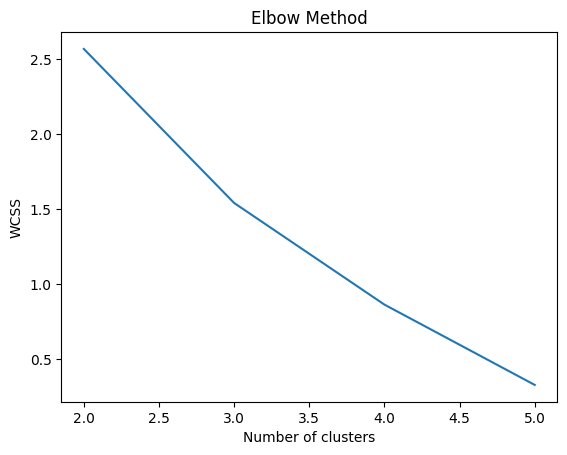

In [7]:
# Plot the Elbow method
plt.plot(range(2, k_max), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [33]:
# Thuật toán phân cụm văn bản bằng K-Mean
import os
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
import matplotlib.pyplot as plt

In [34]:
folder_path = "D:/ONTAPCUOIKI/Crawling"

# Đọc nội dung từ tất cả các tệp .txt trong thư mục
def read_text_files(directory):
    text_data = []
    for filename in os.listdir(directory):
        if filename.endswith(".txt"):
            filepath = os.path.join(directory, filename)
            with open(filepath, "r", encoding="utf-8") as file:
                text_data.append(file.read())
    return text_data

In [35]:
complaints = read_text_files(folder_path)

In [36]:
# Xử lý stopword tiếng anh
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(complaints)

In [26]:
# Xử lý stopword tiếng việt
# def load_vietnamese_stopwords(stopwords_file_path):
#     try:
#         with open(stopwords_file_path, 'r', encoding='utf-8') as f:
#             return f.read().splitlines()
#     except FileNotFoundError:
#         print(f'File not found: {stopwords_file_path}')
#         return []

In [27]:
# stopwords_file_path = "D:/26/Cau2/vietnamese-stopwords.txt"
# stopwords_list = load_vietnamese_stopwords(stopwords_file_path)
# vectorizer = TfidfVectorizer(stop_words=stopwords_list)
# X = vectorizer.fit_transform(complaints)

C:\Users\MSI PC\AppData\Roaming\Python\Python39\site-packages\sklearn\feature_extraction\text.py:406: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['bao', 'bay', 'biến', 'biệt', 'bây', 'bõm', 'bảo', 'bất', 'bẩy', 'bập', 'bắt', 'bội', 'chao', 'chi', 'chia', 'chu', 'chui', 'chuẩn', 'chà', 'chành', 'chí', 'chót', 'chùn', 'chăn', 'chũn', 'chưng', 'chạnh', 'chả', 'chầm', 'chầy', 'chập', 'chắn', 'chẳng', 'chết', 'chốc', 'chừ', 'chừng', 'coi', 'cu', 'cá', 'câu', 'cóc', 'công', 'cạnh', 'cảm', 'cầu', 'cật', 'cắt', 'cổ', 'cụ', 'cục', 'cực', 'da', 'dà', 'dĩ', 'dưng', 'dần', 'dầu', 'dịp', 'dở', 'dụng', 'gian', 'giá', 'giác', 'giời', 'ha', 'hiện', 'hoàn', 'hèn', 'hình', 'hô', 'hầu', 'hậu', 'hẳn', 'hồ', 'hỗ', 'hội', 'hợp', 'hự', 'khói', 'khô', 'khăn', 'khắc', 'khẳng', 'kia', 'kiện', 'kê', 'kì', 'kìa', 'kỳ', 'lai', 'le', 'liên', 'liệt', 'loạt', 'luận', 'luật', 'luốt', 'lình', 'lí', 'lô', 'lý', 'lập', 'lẽ', 'lị', 'lự', 'lực', 'mày

In [37]:
silhouette_scores = []
k_max = 6
for i in range(2, k_max):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    labels = kmeans.labels_
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

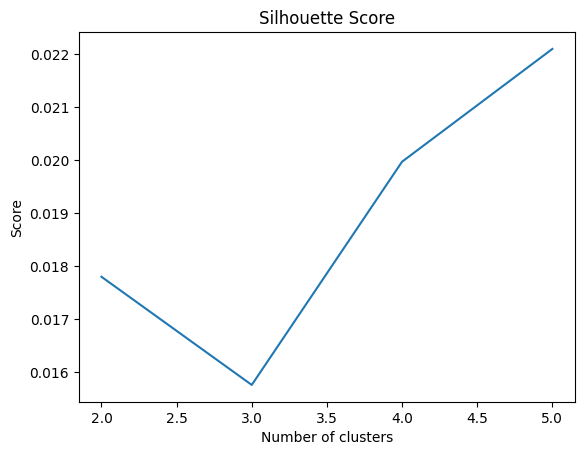

In [38]:
# Vẽ biểu đồ Silhouette Scores
plt.plot(range(2, k_max), silhouette_scores)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.show()

In [42]:
# Lựa chọn số cụm và tạo mô hình KMeans
num_clusters = 3
km = KMeans(n_clusters=num_clusters, init='k-means++', max_iter=300, n_init=3, random_state=0)
km.fit(X)

KMeans(n_clusters=3, n_init=3, random_state=0)

In [43]:
# Hàm tokenization (có thể thay thế bằng thư viện khác nếu cần)
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

stemmer = PorterStemmer()

def tokenize_and_stem(text):
    tokens = word_tokenize(text)
    stems = [stemmer.stem(t) for t in tokens]
    return stems

def tokenize_only(text):
    tokens = word_tokenize(text)
    return tokens


Numbers of Docs per cluster:
cluster
0     7
1    16
2     4
Name: count, dtype: int64
Top 5 words closest to the cluster centers:
Cluster 0 words: bluesky, spyware, chatbot, quantum, security, 
Cluster 1 words: app, apple, ai, year, read, 
Cluster 2 words: image, siri, apple, playground, intelligence, 


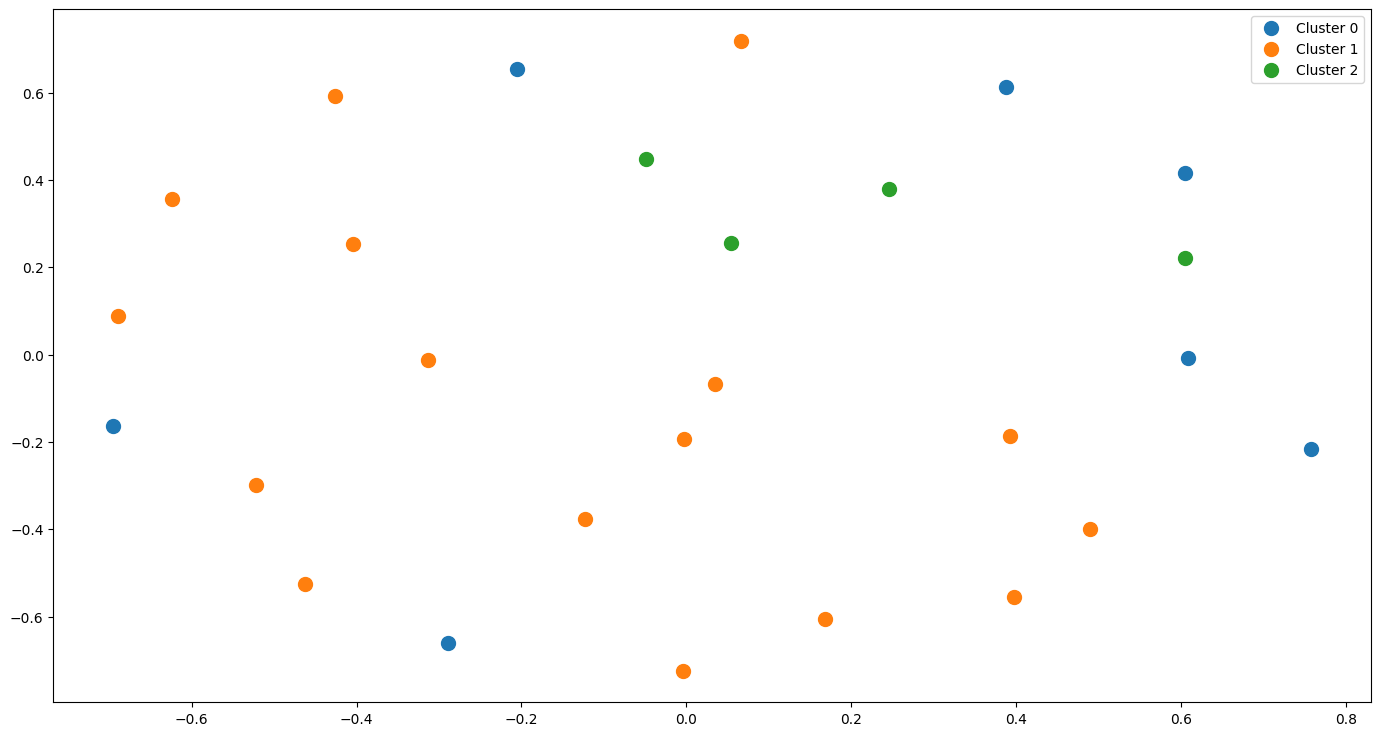

In [44]:
def Presentation_Data(complaints, km, num_clusters):
    ranks = list(range(1, len(complaints) + 1))
    clusters = km.labels_.tolist()
    complaints_data = {'rank': ranks, 'complaints': complaints, 'cluster': clusters}
    frame = pd.DataFrame(complaints_data, columns=['rank', 'complaints', 'cluster'])

    # Thống kê số lượng văn bản trong mỗi cụm
    print("Numbers of Docs per cluster:")
    print(frame['cluster'].value_counts().sort_index())

    # Xác định 5 từ gần tâm cụm nhất
    terms = vectorizer.get_feature_names_out()
    order_centroids = km.cluster_centers_.argsort()[:, ::-1]

    print("Top 5 words closest to the cluster centers:")
    for i in range(num_clusters):
        print(f"Cluster {i} words: ", end='')
        for ind in order_centroids[i, :5]:
            print(f"{terms[ind]}", end=', ')
        print()

    # Biểu diễn dữ liệu trên đồ thị 2D
    similarity_distance = 1 - cosine_similarity(X)
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
    pos = mds.fit_transform(similarity_distance)
    xs, ys = pos[:, 0], pos[:, 1]

    # Thiết lập màu sắc và tên cho mỗi cụm
    cluster_colors = {i: plt.cm.tab10(i) for i in range(num_clusters)}
    cluster_names = {i: f"Cluster {i}" for i in range(num_clusters)}

    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters))
    groups = df.groupby('label')

    # Vẽ biểu đồ
    fig, ax = plt.subplots(figsize=(17, 9))
    for name, group in groups:
        ax.plot(group.x, group.y, marker="o", linestyle='', ms=10,
                label=cluster_names[name], color=cluster_colors[name])
        ax.set_aspect('auto')
    ax.legend(numpoints=1)
    plt.show()

# Biểu diễn dữ liệu
Presentation_Data(complaints, km, num_clusters)